In [72]:
import requests
import json
import pandas as pd

from shapely.geometry import Polygon
pharmacy_ocp = pd.read_csv('./csv/Fixed OCP Search.csv')

for iter, row in pharmacy_ocp.iterrows():
    postal_code = str(row['Postal Code']).replace(" ", "+")
    city = str(row['City']).replace(" ", "+")
    url = f'http://localhost:8080/search.php?q={postal_code}%2C+{city}%2C+ontario&format=jsonv2'
    print(url)
    req = requests.get(url)
    try:
        lat = req.json()[0]['lat']
        lon = req.json()[0]['lon']
        row['Latitude'] = lat
        row['Longitude'] = lon
    except IndexError as err:
        print(err)

http://localhost:8080/search.php?q=K1H+8K7%2C+Ottawa%2C+ontario&format=jsonv2


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

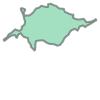

In [74]:
response = requests.post(
    "http://localhost:8080/ors/v2/isochrones/driving-car",
    json={
        "locations": [
            [
                -79.27657943558222,
                43.79318073359685,
            ]
        ],
        "range": [900],
    },
)

Polygon(response.json()["features"][0]["geometry"]["coordinates"][0])